# Chart Visualization

In [131]:
import matplotlib.pyplot as plt
# plt : matplotlib 에서 그래프를 그리기 위한 제어 object

plt.close("all")

In [132]:
import pandas as pd
import numpy as np

In [133]:
%matplotlib inline # 그래프 표출을 위한 명령어

UsageError: unrecognized arguments: # 그래프 표출을 위한 명령어


## Basic plotting: plot

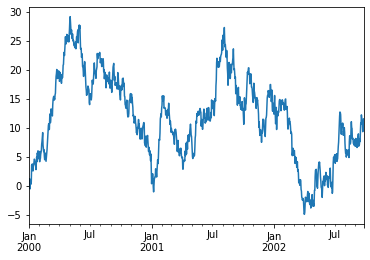

In [134]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))

ts = ts.cumsum()

ts.plot();

<Figure size 432x288 with 0 Axes>

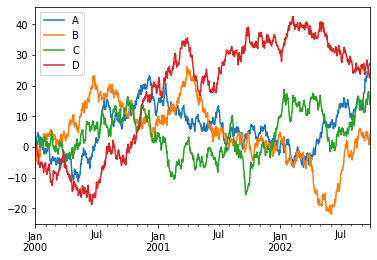

In [135]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list("ABCD"))
df = df.cumsum()

plt.figure() # Figure 객체 생성
df.plot()

In [136]:
plt.close()

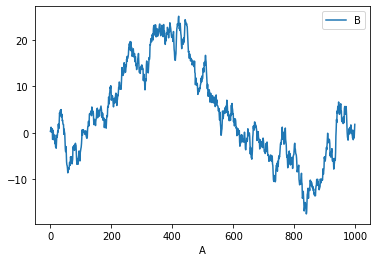

In [137]:
df3 = pd.DataFrame(np.random.randn(1000, 2), columns=["B", "C"]).cumsum()

df3["A"] = pd.Series(list(range(len(df))))

df3.plot(x="A", y="B");

### (고급) 여러 개의 Figure object handling
- 코랩에서는 구동 방식이 달라서 object가 완전히 사라지지는 않음.
- Handler object를 통해 조정하는 방식을 익히는 것으로.


<Figure size 432x288 with 0 Axes>

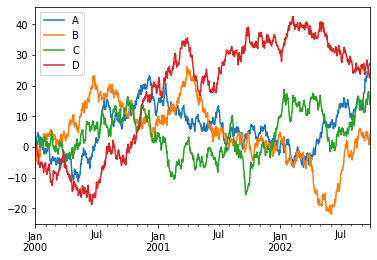

In [138]:
fig1 = plt.figure()
df.plot()

<Figure size 432x288 with 0 Axes>

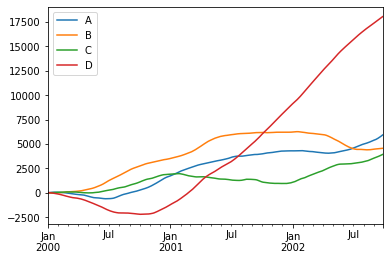

In [139]:
fig2 = plt.figure()
df_temp = df.cumsum()
df_temp.plot()

In [140]:
plt.close("all")

## The kinds of plot methods in pd.DataFrame.plot


In [141]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list("ABCD"))
df.plot?


- 'line' : line plot (default)
- 'bar' : vertical bar plot
- 'barh' : horizontal bar plot
- 'hist' : histogram
- 'box' : boxplot
- 'kde' : Kernel Density Estimation plot
- 'density' : same as 'kde'
- 'area' : area plot
- 'pie' : pie plot
- 'scatter' : scatter plot (DataFrame only)
- 'hexbin' : hexbin plot (DataFrame only)

## bar plot

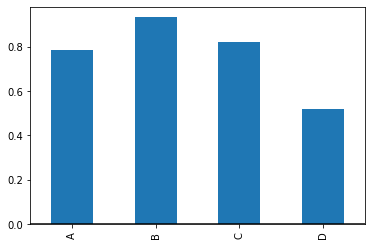

In [142]:
plt.figure()
df.iloc[5].plot(kind="bar")
plt.axhline(0, color="k")

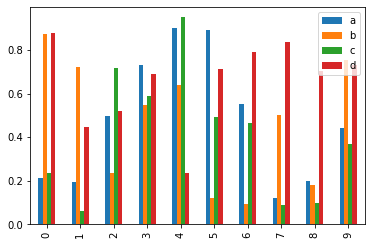

In [143]:
df2 = pd.DataFrame(np.random.rand(10, 4), columns=["a", "b", "c", "d"])
df2.plot.bar()

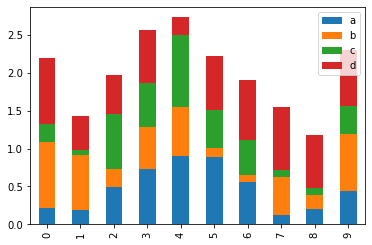

In [144]:
df2.plot.bar(stacked=True)

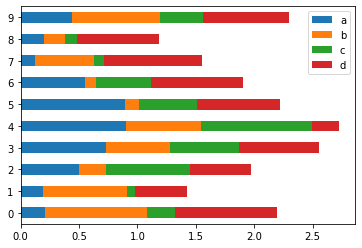

In [145]:
df2.plot.barh(stacked=True)

## Histogram

<Figure size 432x288 with 0 Axes>

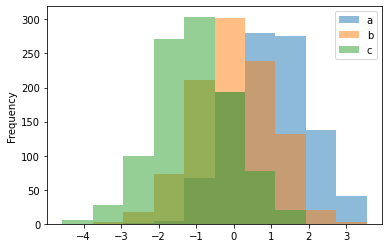

In [146]:
df4 = pd.DataFrame(
    {
        "a": np.random.randn(1000) + 1,
        "b": np.random.randn(1000),
        "c": np.random.randn(1000) - 1,
    },
    columns=["a", "b", "c"],
)


plt.figure();

df4.plot.hist(alpha=0.5);

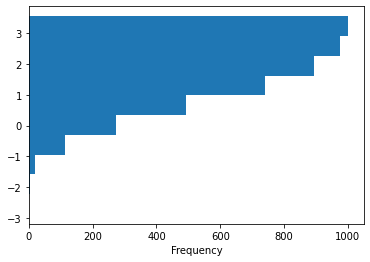

In [147]:
plt.figure();

df4["a"].plot.hist(orientation="horizontal", cumulative=True);

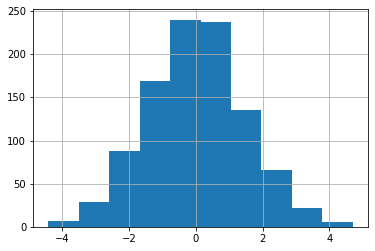

In [148]:
plt.figure();

df["A"].diff().hist();

<Figure size 432x288 with 0 Axes>

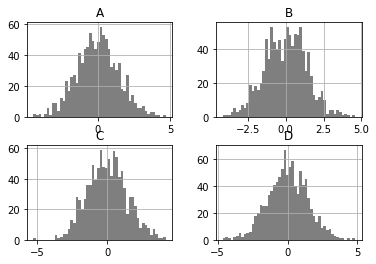

In [149]:
plt.figure();

df.diff().hist(color="k", alpha=0.5, bins=50);

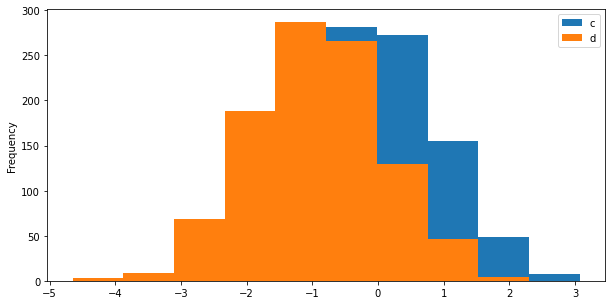

In [150]:
data = pd.DataFrame(
    {
        "a": np.random.choice(["x", "y", "z"], 1000),
        "b": np.random.choice(["e", "f", "g"], 1000),
        "c": np.random.randn(1000),
        "d": np.random.randn(1000) - 1,
    },
)


data.plot.hist(by=["a", "b"], figsize=(10, 5));

### Box plot

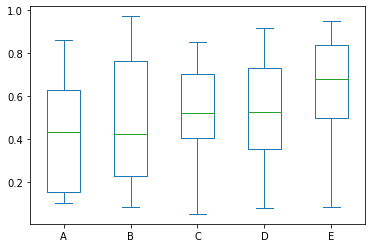

In [151]:
df = pd.DataFrame(np.random.rand(10, 5), columns=["A", "B", "C", "D", "E"])
df.plot.box()

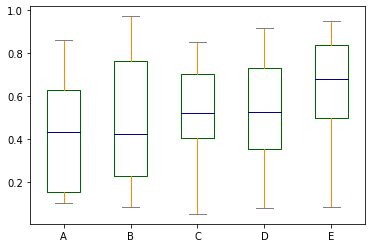

In [152]:
color = {
    "boxes": "DarkGreen",
    "whiskers": "DarkOrange",
    "medians": "DarkBlue",
    "caps": "Gray",
}


df.plot.box(color=color, sym="r+")

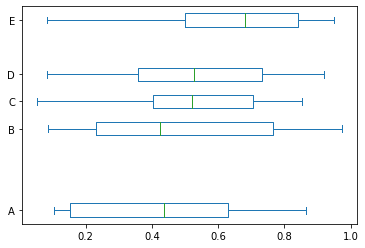

In [153]:
df.plot.box(vert=False, positions=[1, 4, 5, 6, 8]);

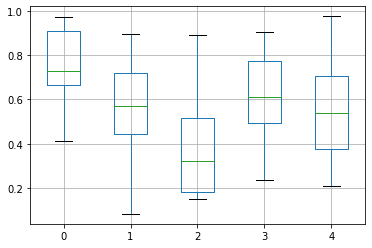

In [154]:
df = pd.DataFrame(np.random.rand(10, 5))

plt.figure();

bp = df.boxplot()

## Area plot

NaN 값이 있을경우 자동으로 0으로 처리함.
이 방법이 아닌 다른 방법으로 처리할 경우 plot 전에 df.dropna() 또는 df.fillna()로 전처리 필요함.


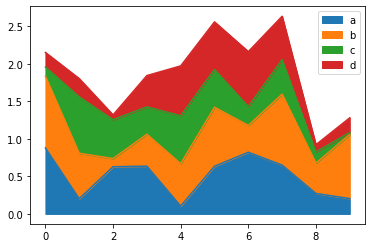

In [155]:
df = pd.DataFrame(np.random.rand(10, 4), columns=["a", "b", "c", "d"])
df.plot.area()

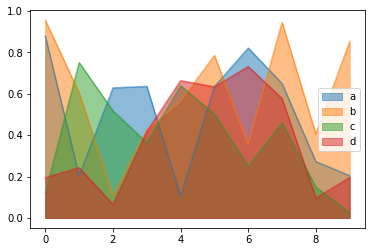

In [156]:
df.plot.area(stacked=False)

## Scatter plot


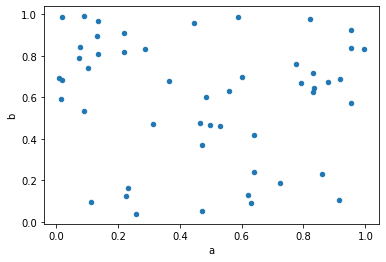

In [157]:
df = pd.DataFrame(np.random.rand(50, 4), columns=["a", "b", "c", "d"])
df["species"] = pd.Categorical(
    ["setosa"] * 20 + ["versicolor"] * 20 + ["virginica"] * 10)
df.plot.scatter(x="a", y="b")

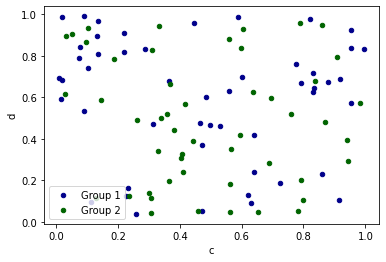

In [158]:
# Axis hanlder
ax = df.plot.scatter(x="a", y="b", color="DarkBlue", label="Group 1")
df.plot.scatter(x="c", y="d", color="DarkGreen", label="Group 2", ax=ax)

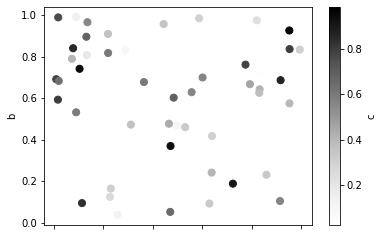

In [159]:
# parameter c : color
# https://matplotlib.org/stable/gallery/color/named_colors.html
df.plot.scatter(x="a", y="b", c="c", s=50)

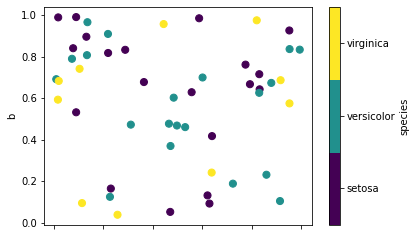

In [160]:
# parameter cmap : colormap
# Reference https://matplotlib.org/stable/tutorials/colors/colormaps.html
df.plot.scatter(x="a", y="b", c="species", cmap="viridis", s=50)

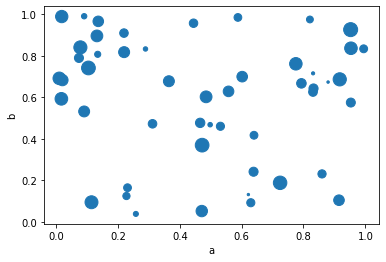

In [161]:
# parameter s : size 
df.plot.scatter(x="a", y="b", s=df["c"] * 200)

# Hexagonal bin plot

데이터 밀도가 높아 개개의 데이터 포인트를 사용하기 어려울 때, Scatter plot 대신 사용 가능

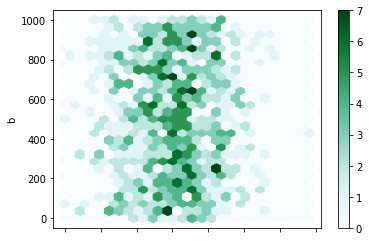

In [162]:
df = pd.DataFrame(np.random.randn(1000, 2), columns=["a", "b"])
df["b"] = df["b"] + np.arange(1000)
df.plot.hexbin(x="a", y="b", gridsize=25)

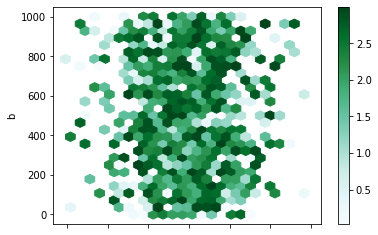

In [163]:
df = pd.DataFrame(np.random.randn(1000, 2), columns=["a", "b"])

df["b"] = df["b"] + np.arange(1000)

df["z"] = np.random.uniform(0, 3, 1000)

df.plot.hexbin(x="a", y="b", C="z", reduce_C_function=np.max, gridsize=25)

## Plotly
Interactive plot에 강점이 있는 plotting library

In [169]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter(df, x="sepal_width", y="sepal_length", color="species")
fig.show()

fig.write_html("xxx.html")